# Loading dataset and performing basic stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import random
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB , GaussianNB ,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('0000000000002747_training_twitter_x_y_train.csv')
df = df[['text' , 'airline_sentiment' ]]

In [3]:
df.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [4]:
df.shape

(10980, 2)

In [5]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [6]:
df.dtypes

text                 object
airline_sentiment    object
dtype: object

# Tokenizing

In [7]:
df.loc[1][0]

'@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!'

In [8]:
# Reformatting dataset to list of tuples, each tuple has 2 elements, 1st is list of words and 2nd is its category

documents = []
for i in range(len(df)):
    category = df.loc[i][1]
    words = word_tokenize(df.loc[i][0])
    documents.append((words , category))
documents[0:2]

[(['@',
   'SouthwestAir',
   'I',
   'am',
   'scheduled',
   'for',
   'the',
   'morning',
   ',',
   '2',
   'days',
   'after',
   'the',
   'fact',
   ',',
   'yes',
   '..',
   'not',
   'sure',
   'why',
   'my',
   'evening',
   'flight',
   'was',
   'the',
   'only',
   'one',
   'Cancelled',
   'Flightled'],
  'negative'),
 (['@',
   'SouthwestAir',
   'seeing',
   'your',
   'workers',
   'time',
   'in',
   'and',
   'time',
   'out',
   'going',
   'above',
   'and',
   'beyond',
   'is',
   'why',
   'I',
   'love',
   'flying',
   'with',
   'you',
   'guys',
   '.',
   'Thank',
   'you',
   '!'],
  'positive')]

In [9]:
len(documents)

10980

In [10]:
# shuffling documents
random.shuffle(documents)

# creating list of stopwords

In [11]:
stops = stopwords.words('english') + list(string.punctuation)

# Lemmatizing

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# defining fuction to convert part of speech into simple part of speech so that wordLemmatizer can understand

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [14]:
# function to remove no.'s from the feature vocabulary

def NotNumber(w):
    for ch in w:
        if(ch>='0' and ch<='9'):
            return False
    return True

In [15]:
# defining function to make the list of words clear 

def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops and NotNumber(w)==True:
            pos = pos_tag([w])                                 
            clean_word = lemmatizer.lemmatize(w, get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [16]:
# Creating clear documents

start = time.time()
documents = [(clean_review(document), category) for document, category in documents]
end = time.time()
print("Cleaning time: ", end - start)

Cleaning time:  55.69916915893555


In [17]:
documents[0]

(['southwestair', "n't", 'ever', 'tweet'], 'negative')

In [18]:
# again reformatting dataset in the form of of  x and y, so as to feed it to sklearn classifiers

categories = [category for document, category in documents]
text_documents = [" ".join(document) for document, category in documents]

In [19]:
# train - test split

X_train, X_test, y_train, y_test = train_test_split(text_documents, categories , random_state=1 , test_size=0.2)

# using TfidfVectorizer and applying different algos

In [20]:
tfidf = TfidfVectorizer()
X_train_t = tfidf.fit_transform(X_train)
X_test_t = tfidf.transform(X_test)

In [21]:
alg1 = LogisticRegression()

start = time.time()
alg1.fit(X_train_t , y_train)
end = time.time()
total_time1 = end - start

y_pred1 = alg1.predict(X_test_t)

print('accuracy : ', alg1.score(X_test_t , y_test))
print('time : ' , total_time1)

accuracy :  0.7727686703096539
time :  0.9893193244934082


In [22]:
alg2 = RandomForestClassifier()

start = time.time()
alg2.fit(X_train_t , y_train)
end = time.time()
total_time2 = end - start

y_pred2 = alg2.predict(X_test_t)

print('accuracy : ', alg2.score(X_test_t , y_test))
print('time : ' , total_time2)

accuracy :  0.7463570127504554
time :  7.330405235290527


In [23]:
alg3 = DecisionTreeClassifier(max_depth=4 , criterion='gini')

start = time.time()
alg3.fit(X_train_t , y_train)
end = time.time()
total_time3 = end - start

y_pred3 = alg3.predict(X_test_t)

print('accuracy : ', alg3.score(X_test_t , y_test))
print('time : ' , total_time3)

accuracy :  0.6798724954462659
time :  0.05487227439880371


In [24]:
alg4 = BernoulliNB()

start = time.time()
alg4.fit(X_train_t,y_train)
end = time.time()
total_time4 = end - start

y_pred4 = alg4.predict(X_test_t)

print('accuracy : ', alg4.score(X_test_t , y_test))
print('time : ' , total_time4)

accuracy :  0.7358834244080146
time :  0.015921592712402344


In [28]:
alg5 = GaussianNB()

start = time.time()
alg5.fit(X_train_t.toarray(),y_train)
end = time.time()
total_time5 = end - start

y_pred5 = alg5.predict(X_test_t.toarray())

print('accuracy : ', alg5.score(X_test_t.toarray() , y_test))
print('time : ' , total_time5)

accuracy :  0.4690346083788707
time :  2.038548231124878


In [29]:
alg6 = MultinomialNB()

start = time.time()
alg6.fit(X_train_t,y_train)
end = time.time()
total_time6 = end - start

y_pred6 = alg6.predict(X_test_t)

print('accuracy : ', alg6.score(X_test_t , y_test))
print('time : ' , total_time6)

accuracy :  0.6785063752276868
time :  0.0159604549407959


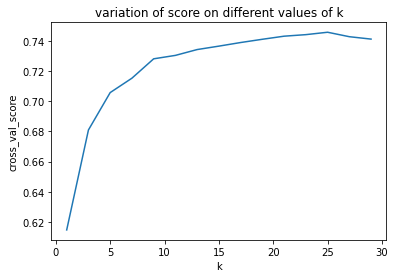

In [30]:
x_axis = []
y_axis = []
for k in range(1, 30, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X_train_t, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=0))
    x_axis.append(k)
    y_axis.append(score.mean())
plt.plot(x_axis, y_axis)
plt.xlabel("k")
plt.ylabel("cross_val_score")
plt.title("variation of score on different values of k")
plt.show()

In [31]:
alg7 = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto', p=2, metric='minkowski')

start = time.time()
alg7.fit(X_train_t, y_train)
end = time.time()
total_time7 = end - start

y_pred7 = alg7.predict(X_test_t)

print('accuracy : ', alg7.score(X_test_t , y_test))
print('time : ' , total_time7)

accuracy :  0.7390710382513661
time :  0.010972976684570312


In [32]:
alg8 = SVC()

start = time.time()
alg8.fit(X_train_t, y_train)
end = time.time()
total_time8 = end - start

y_pred8 = alg8.predict(X_test_t)

print('accuracy : ', alg8.score(X_test_t , y_test))
print('time : ' , total_time8)

accuracy :  0.7691256830601093
time :  10.108824014663696


In [33]:
alg9 = LinearSVC(multi_class='crammer_singer')

start = time.time()
alg9.fit(X_train_t, y_train)
end = time.time()
total_time9 = end - start

y_pred9 = alg9.predict(X_test_t)

print('accuracy : ', alg9.score(X_test_t , y_test))
print('time : ' , total_time9)

accuracy :  0.7659380692167578
time :  0.9996671676635742


In [34]:
alg10 = RidgeClassifier()

start = time.time()
alg10.fit(X_train_t, y_train)
end = time.time()
total_time10 = end - start

y_pred10 = alg10.predict(X_test_t)

print('accuracy : ', alg10.score(X_test_t , y_test))
print('time : ' , total_time10)

accuracy :  0.7718579234972678
time :  0.09916257858276367


In [35]:
df_model=pd.DataFrame({
'Model_Applied':['Logistic_Regression', 'Random_Forest', 'Decision_tree', 'BernoulliNB', 'GausianNB', 'MultinomialNB', 'KNN', 'SVC', 'Linear_SVC', 'Ridge_Classifier'],
'Accuracy':[alg1.score(X_test_t,y_test), alg2.score(X_test_t,y_test), alg3.score(X_test_t,y_test), alg4.score(X_test_t,y_test),
            alg5.score(X_test_t.todense(),y_test), alg6.score(X_test_t,y_test), alg7.score(X_test_t,y_test), alg8.score(X_test_t,y_test),
            alg9.score(X_test_t,y_test), alg10.score(X_test_t,y_test)],
'Training_Time':[total_time1, total_time2, total_time3, total_time4, total_time5, total_time6, total_time7, total_time8, 
                 total_time9, total_time10]})

In [36]:
df_model

,Model_Applied,Accuracy,Training_Time
0,Logistic_Regression,0.772769,0.989319
1,Random_Forest,0.746357,7.330405
2,Decision_tree,0.679872,0.054872
3,BernoulliNB,0.735883,0.015922
4,GausianNB,0.469035,2.038548
5,MultinomialNB,0.678506,0.015960
6,KNN,0.739071,0.010973
7,SVC,0.769126,10.108824
8,Linear_SVC,0.765938,0.999667
9,Ridge_Classifier,0.771858,0.099163


<AxesSubplot:title={'center':'Accurcy comparison of different Models'}, xlabel='Model_Applied', ylabel='Accuracy'>

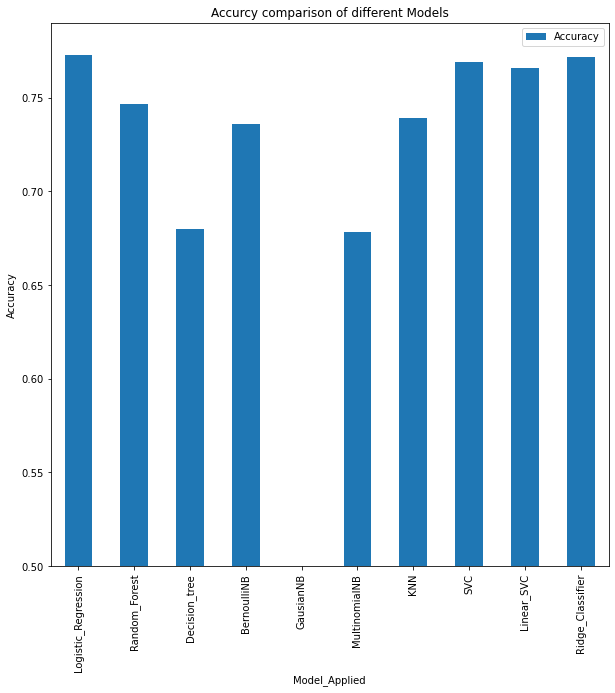

In [37]:
df_model.plot(kind='bar',x='Model_Applied', ylim=[0.5,0.79] , y='Accuracy', figsize=(10,10) , ylabel='Accuracy', title='Accurcy comparison of different Models')

<AxesSubplot:title={'center':'Training time comparison of different Models'}, xlabel='Model_Applied', ylabel='Training Time'>

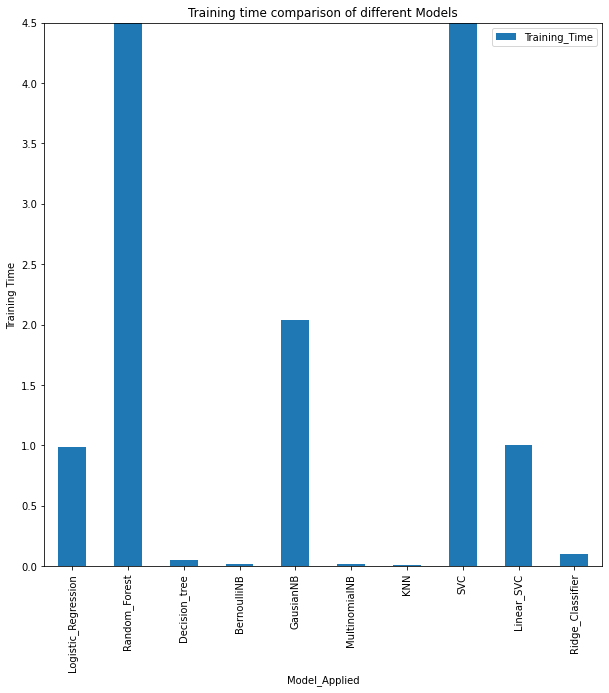

In [38]:
df_model.plot(kind='bar',x='Model_Applied', ylim=[0,4.5] , y='Training_Time', figsize=(10,10), ylabel='Training Time', title='Training time comparison of different Models')

# using CountVectorizer and applying different algos

In [39]:
count_vec = CountVectorizer(max_features = 3000 , ngram_range=(1,2) , max_df=0.3)
X_train_c = count_vec.fit_transform(X_train)
X_test_c = count_vec.transform(X_test)
X_train_c.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
count_vec.get_feature_names()

['aa',
 'aadvantage',
 'abc',
 'able',
 'able get',
 'absolute',
 'absolutely',
 'absurd',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accommodate',
 'accommodation',
 'accord',
 'account',
 'acct',
 'across',
 'act',
 'act together',
 'action',
 'actual',
 'actually',
 'add',
 'add flight',
 'additional',
 'address',
 'admiral',
 'admiral club',
 'advance',
 'advantage',
 'advice',
 'advise',
 'advisory',
 'afford',
 'afternoon',
 'age',
 'agent',
 'agent help',
 'agent phone',
 'agent say',
 'agents',
 'ago',
 'ah',
 'ahead',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airline cancelled',
 'airline ever',
 'airline flight',
 'airline get',
 'airline ve',
 'airlines',
 'airplane',
 'airport',
 'airport flight',
 'airport hour',
 'airway',
 'airways',
 'alert',
 'all',
 'alliance',
 'allow',
 'almost',
 'almost hour',
 'alone',
 'along',
 'already',
 'already cancelled',
 'already delayed',
 'alright',
 'also',
 'alternate',
 'although',
 'always',
 'am',
 'amaze',
 'amaze c

In [41]:
alg1 = LogisticRegression()

start = time.time()
alg1.fit(X_train_c , y_train)
end = time.time()
total_time1 = end - start

y_pred1 = alg1.predict(X_test_c)

print('accuracy : ', alg1.score(X_test_c , y_test))
print('time : ' , total_time1)

accuracy :  0.7641165755919854
time :  0.5582406520843506


In [42]:
alg2 = RandomForestClassifier(n_estimators=60)

start = time.time()
alg2.fit(X_train_c , y_train)
end = time.time()
total_time2 = end - start

y_pred2 = alg2.predict(X_test_c)

print('accuracy : ', alg2.score(X_test_c , y_test))
print('time : ' , total_time2)

accuracy :  0.7427140255009107
time :  3.8731987476348877


In [43]:
alg3 = DecisionTreeClassifier(max_depth=1 , criterion='gini')

start = time.time()
alg3.fit(X_train_c , y_train)
end = time.time()
total_time3 = end - start

y_pred3 = alg3.predict(X_test_c)

print('accuracy : ', alg3.score(X_test_c , y_test))
print('time : ' , total_time3)

accuracy :  0.645264116575592
time :  0.008034467697143555


In [44]:
alg4 = BernoulliNB()

start = time.time()
alg4.fit(X_train_c,y_train)
end = time.time()
total_time4 = end - start

y_pred4 = alg4.predict(X_test_c)

print('accuracy : ', alg4.score(X_test_c , y_test))
print('time : ' , total_time4)

accuracy :  0.7550091074681239
time :  0.014958381652832031


In [45]:
alg5 = GaussianNB()

start = time.time()
alg5.fit(X_train_c.todense(),y_train)
end = time.time()
total_time5 = end - start

y_pred5 = alg5.predict(X_test_c.todense())

print('accuracy : ', alg5.score(X_test_c.todense() , y_test))
print('time : ' , total_time5)

accuracy :  0.5218579234972678
time :  0.7748432159423828


In [46]:
alg6 = MultinomialNB()

start = time.time()
alg6.fit(X_train_c,y_train)
end = time.time()
total_time6 = end - start

y_pred6 = alg6.predict(X_test_c)

print('accuracy : ', alg6.score(X_test_c , y_test))
print('time : ' , total_time6)

accuracy :  0.7531876138433515
time :  0.011968612670898438


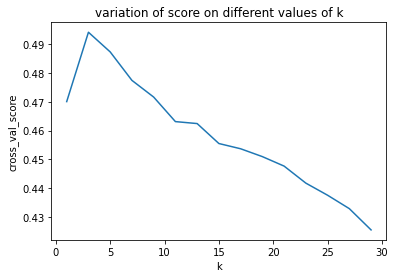

In [47]:
x_axis = []
y_axis = []
for k in range(1, 30, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X_train_c, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=0))
    x_axis.append(k)
    y_axis.append(score.mean())
plt.plot(x_axis, y_axis)
plt.xlabel("k")
plt.ylabel("cross_val_score")
plt.title("variation of score on different values of k")
plt.show()

In [48]:
alg7 = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', p=2, metric='minkowski')

start = time.time()
alg7.fit(X_train_c, y_train)
end = time.time()
total_time7 = end - start

y_pred7 = alg7.predict(X_test_c)

print('accuracy : ', alg7.score(X_test_c , y_test))
print('time : ' , total_time7)

accuracy :  0.4936247723132969
time :  0.0049517154693603516


In [49]:
alg8 = SVC()

start = time.time()
alg8.fit(X_train_c, y_train)
end = time.time()
total_time8 = end - start

y_pred8 = alg8.predict(X_test_c)

print('accuracy : ', alg8.score(X_test_c , y_test))
print('time : ' , total_time8)

accuracy :  0.7668488160291439
time :  7.429110050201416


In [50]:
alg9 = LinearSVC(multi_class='crammer_singer')

start = time.time()
alg9.fit(X_train_c, y_train)
end = time.time()
total_time9 = end - start

y_pred9 = alg9.predict(X_test_c)

print('accuracy : ', alg9.score(X_test_c , y_test))
print('time : ' , total_time9)

accuracy :  0.7367941712204007
time :  1.7438886165618896


In [51]:
alg10 = RidgeClassifier()

start = time.time()
alg10.fit(X_train_c, y_train)
end = time.time()
total_time10 = end - start

y_pred10 = alg10.predict(X_test_c)

print('accuracy : ', alg10.score(X_test_c , y_test))
print('time : ' , total_time10)

accuracy :  0.7413479052823315
time :  0.15257978439331055


In [52]:
df_model=pd.DataFrame({
'Model_Applied':['Logistic_Regression', 'Random_Forest', 'Decision_tree', 'BernoulliNB', 'GausianNB', 'MultinomialNB', 'KNN', 'SVC', 'Linear_SVC', 'Ridge_Classifier'],
'Accuracy':[alg1.score(X_test_c,y_test), alg2.score(X_test_c,y_test), alg3.score(X_test_c,y_test), alg4.score(X_test_c,y_test),
            alg5.score(X_test_c.todense(),y_test), alg6.score(X_test_c,y_test), alg7.score(X_test_c,y_test), alg8.score(X_test_c,y_test),
            alg9.score(X_test_c,y_test), alg10.score(X_test_c,y_test)],
'Training_Time':[total_time1, total_time2, total_time3, total_time4, total_time5, total_time6, total_time7, total_time8, 
                 total_time9, total_time10]})

In [53]:
df_model

,Model_Applied,Accuracy,Training_Time
0,Logistic_Regression,0.764117,0.558241
1,Random_Forest,0.742714,3.873199
2,Decision_tree,0.645264,0.008034
3,BernoulliNB,0.755009,0.014958
4,GausianNB,0.521858,0.774843
5,MultinomialNB,0.753188,0.011969
6,KNN,0.493625,0.004952
7,SVC,0.766849,7.429110
8,Linear_SVC,0.736794,1.743889
9,Ridge_Classifier,0.741348,0.152580


<AxesSubplot:title={'center':'Accurcy comparison of different Models'}, xlabel='Model_Applied', ylabel='Accuracy'>

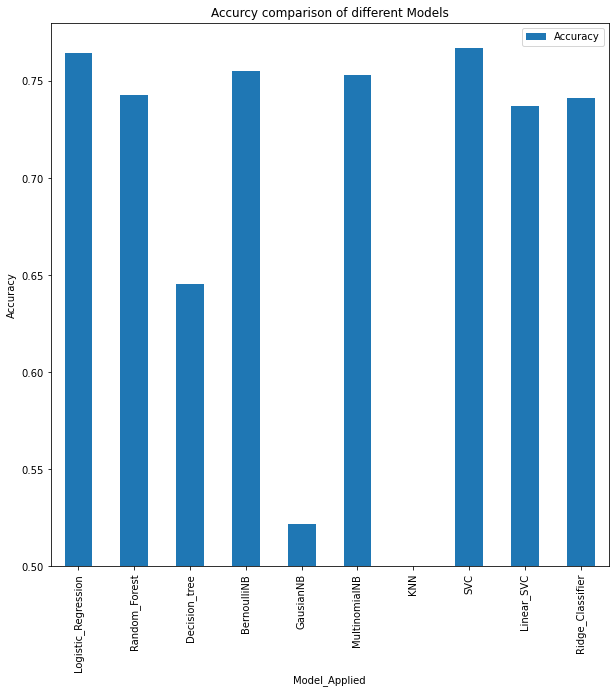

In [54]:
df_model.plot(kind='bar',x='Model_Applied', ylim=[0.5,0.78] , y='Accuracy', figsize=(10,10) , ylabel='Accuracy', title='Accurcy comparison of different Models')

<AxesSubplot:title={'center':'Training time comparison of different Models'}, xlabel='Model_Applied', ylabel='Training Time'>

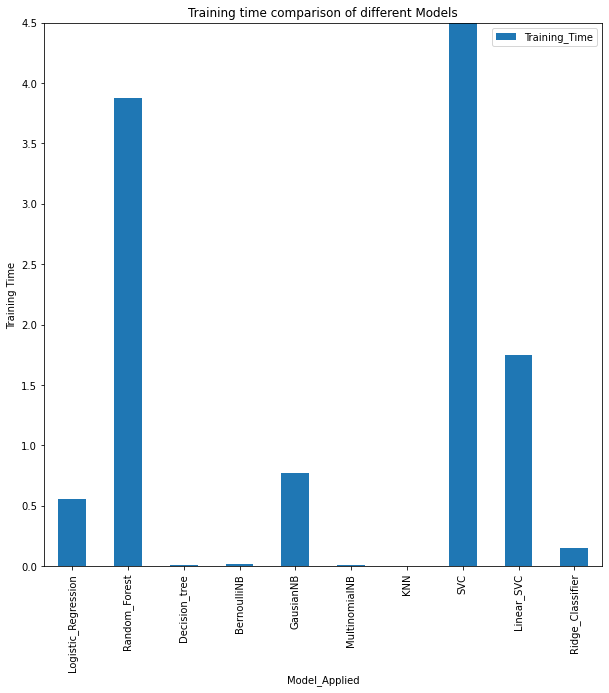

In [55]:
df_model.plot(kind='bar',x='Model_Applied', ylim=[0,4.5] , y='Training_Time', figsize=(10,10), ylabel='Training Time', title='Training time comparison of different Models')